# SVM TEST

In [1]:
from utils.hog import HOGDescriptor
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from utils.hog import HOGDescriptor
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize HOG descriptor with optimized parameters for 48x48 images
hog_descriptor = HOGDescriptor()

In [3]:
# Function to load images and compute HOG descriptors
def load_images_from_folder(folder):
    hog_features = []
    labels = []
    for label in os.listdir(folder):
        if label not in ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]:
            continue  # Skip any non-relevant files or directories
        label_idx = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"].index(label)
        path = os.path.join(folder, label)
        print(f'start feature extraction {label}')
        for filename in tqdm(os.listdir(path)):
            img_path = os.path.join(path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
            if img is not None:
                hog_feature = hog_descriptor.compute(img)
                hog_features.append(hog_feature)
                labels.append(label_idx)
    return np.array(hog_features), np.array(labels)

### SVM TEST on DATASET 1

In [4]:
test_folder = 'datasets/dataset1/test'

In [5]:
features, labels = load_images_from_folder(test_folder)

start feature extraction angry


100%|██████████| 958/958 [00:00<00:00, 9808.15it/s]


start feature extraction disgust


100%|██████████| 111/111 [00:00<00:00, 10125.22it/s]


start feature extraction fear


100%|██████████| 1024/1024 [00:00<00:00, 9974.93it/s] 


start feature extraction happy


100%|██████████| 1774/1774 [00:00<00:00, 9943.60it/s]


start feature extraction neutral


100%|██████████| 1233/1233 [00:00<00:00, 9741.15it/s]


start feature extraction sad


100%|██████████| 1247/1247 [00:00<00:00, 9774.79it/s]


start feature extraction surprise


100%|██████████| 831/831 [00:00<00:00, 9925.95it/s]


In [6]:
model_path = 'svm_hog_expression_classifier_ds1.pkl'
clf = joblib.load(model_path)

In [7]:
# Predict using the trained SVM model
predictions = clf.predict(features)

In [8]:
# Compute metrics
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')
recall = recall_score(labels, predictions, average='weighted')
f1 = f1_score(labels, predictions, average='weighted')

In [9]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(labels, predictions))

Accuracy: 0.46851490665923656
Precision: 0.46120185204207803
Recall: 0.46851490665923656
F1 Score: 0.4606059623542692

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.35      0.34       958
           1       0.54      0.23      0.32       111
           2       0.34      0.26      0.29      1024
           3       0.58      0.72      0.65      1774
           4       0.44      0.46      0.45      1233
           5       0.37      0.34      0.35      1247
           6       0.67      0.56      0.61       831

    accuracy                           0.47      7178
   macro avg       0.47      0.42      0.43      7178
weighted avg       0.46      0.47      0.46      7178



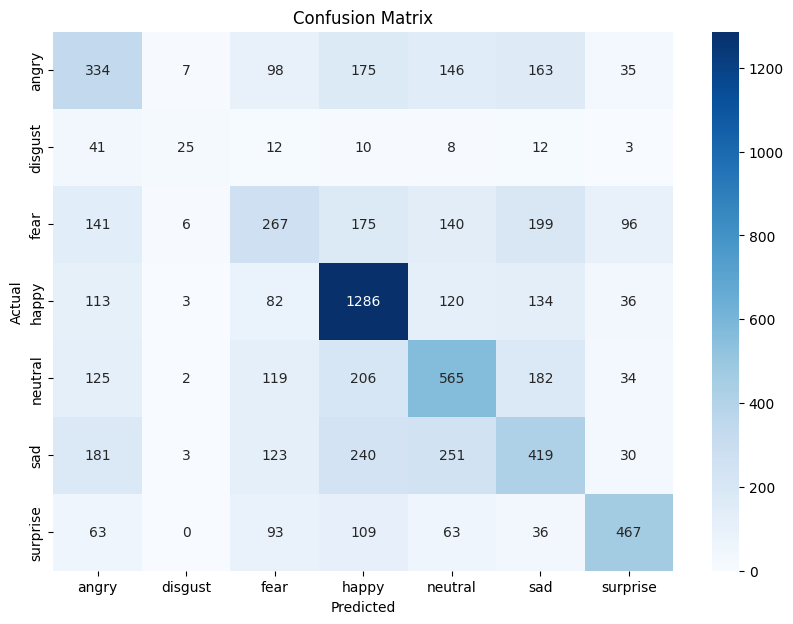

In [10]:
# Confusion matrix
cm = confusion_matrix(labels, predictions)
expressions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,  'neutral': 4 ,'sad': 5, 'surprise': 6}

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=expressions.keys(), yticklabels=expressions.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### SVM TEST on DATASET 2

In [11]:
test_folder = 'datasets/dataset2/test'

In [12]:
features, labels = load_images_from_folder(test_folder)

start feature extraction angry


100%|██████████| 960/960 [00:00<00:00, 3931.48it/s]


start feature extraction disgust


100%|██████████| 111/111 [00:00<00:00, 3712.48it/s]


start feature extraction fear


100%|██████████| 1018/1018 [00:00<00:00, 3310.74it/s]


start feature extraction happy


100%|██████████| 1825/1825 [00:00<00:00, 4161.51it/s]


start feature extraction neutral


100%|██████████| 1216/1216 [00:00<00:00, 4053.24it/s]


start feature extraction sad


100%|██████████| 1139/1139 [00:00<00:00, 3505.57it/s]


start feature extraction surprise


100%|██████████| 797/797 [00:00<00:00, 3685.09it/s]


In [13]:
model_path = 'svm_hog_expression_classifier_ds2.pkl'
clf = joblib.load(model_path)

In [14]:
# Predict using the trained SVM model
predictions = clf.predict(features)

In [15]:
# Compute metrics
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='weighted')
recall = recall_score(labels, predictions, average='weighted')
f1 = f1_score(labels, predictions, average='weighted')

In [16]:
# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print("\nClassification Report:\n", classification_report(labels, predictions))

Accuracy: 0.46943107840362297
Precision: 0.46312642360188117
Recall: 0.46943107840362297
F1 Score: 0.4616886690300917

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.34      0.34       960
           1       0.68      0.24      0.36       111
           2       0.34      0.26      0.29      1018
           3       0.60      0.73      0.65      1825
           4       0.44      0.47      0.45      1216
           5       0.32      0.33      0.32      1139
           6       0.66      0.55      0.60       797

    accuracy                           0.47      7066
   macro avg       0.48      0.42      0.43      7066
weighted avg       0.46      0.47      0.46      7066



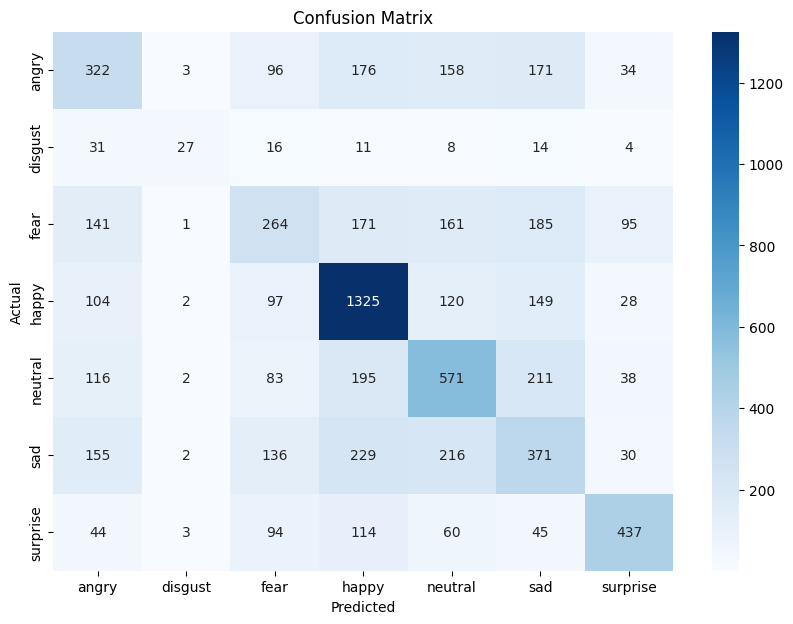

In [17]:
# Confusion matrix
cm = confusion_matrix(labels, predictions)
expressions = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3,  'neutral': 4 ,'sad': 5, 'surprise': 6}

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=expressions.keys(), yticklabels=expressions.keys())
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### CUSTOM TEST

In [32]:
test_image_path = 'bad_and_good_samples/happy2.jpg'
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
hog_feature = hog_descriptor.compute(img)
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
prediction = clf.predict([hog_feature])
print(labels[prediction[0]])

happy


In [33]:
test_image_path = 'bad_and_good_samples/happy4.jpg'
img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
hog_feature = hog_descriptor.compute(img)
labels = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
prediction = clf.predict([hog_feature])
print(labels[prediction[0]])

angry
